In [2]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

#Load data file
aug_test = "Data Files/aug_test.csv"

#Read August Data and store into DataFrame
August_Test = pd.read_csv(aug_test)

In [3]:
# View Data Headers for August Test File
August_Test_df = pd.read_csv(aug_test)
August_Test_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [4]:
#Load August Train Data File
aug_train = "Data Files/aug_train.csv"

# View Data Headers for August Train File 
August_Train_df = pd.read_csv(aug_train)
August_Train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
#Load Sample Submission Sample Data File
sample_submission = "Data Files/sample_submission.csv"

# View Data Headers for Sample Submission File
Sample_Submission_df = pd.read_csv(sample_submission)
Sample_Submission_df.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [6]:
# # create a sample dataframe with x amount of random rows
august_sample_df = August_Train_df.sample(1000)

In [7]:
# use dropna to remove rows with Nan values from dataframe
dropped_df = august_sample_df.dropna()
dropped_df

# reset index of dropped df for enrolee id
dropped_df.reset_index(inplace=True)
del dropped_df['index']
dropped_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32349,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,61,0.0
1,3694,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,1,114,0.0
2,1192,city_98,0.949,Male,No relevent experience,Full time course,Graduate,STEM,1,1000-4999,Pvt Ltd,never,3,1.0
3,27466,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,Humanities,16,50-99,Pvt Ltd,2,50,0.0
4,5468,city_16,0.910,Female,No relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,1,47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,17105,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,never,43,0.0
475,22553,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,1,135,1.0
476,32010,city_103,0.920,Male,Has relevent experience,Part time course,Graduate,STEM,11,10000+,Pvt Ltd,4,36,1.0
477,1501,city_99,0.915,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Other,1,20,0.0


In [8]:
# Get the total number of enrollee
id_value = dropped_df["enrollee_id"].value_counts()
id_value_count = len(id_value)
id_value_count

# Getting the duplicate mice by ID number that shows up for enrollee ID.
dupe_enrollee = dropped_df.loc[dropped_df.duplicated
                                    (subset='enrollee_id'),'enrollee_id'].unique()

#print "there are x enrolees and y duplicates"
print(f'There are {id_value_count} enrollees and {dupe_enrollee} duplicates.')

There are 479 enrollees and [] duplicates.


In [9]:
# use dropped_df to perform test analysis
avg_age = dropped_df['experience'].value_counts()
avg_age

>20    106
6       31
3       29
4       29
9       29
5       25
8       25
7       24
15      21
10      21
2       20
11      17
14      15
12      15
13      14
16      12
17      11
19       9
18       8
<1       7
1        6
20       5
Name: experience, dtype: int64

In [10]:
dropped_df['experience'].dtypes

dtype('O')

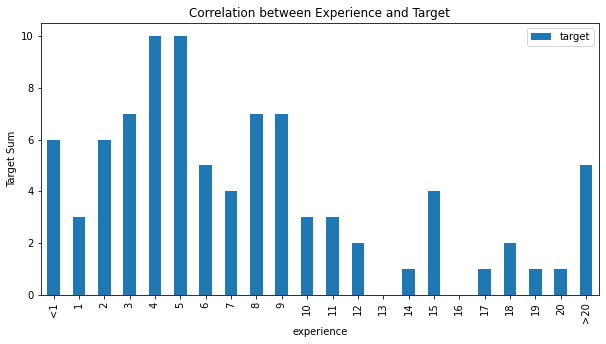

In [11]:
experience_grouped = dropped_df.groupby("experience")
experience_grouped_count = experience_grouped['target'].sum()
exp_df = pd.DataFrame(experience_grouped_count)

exp_df = exp_df.reset_index()


def label_race (row):
   if row['experience'] == '<1' :
      return 0
   if row['experience'] == '>20' :
      return 21
   return row['experience']

exp_df['yr_exp'] = exp_df.apply (lambda row: label_race(row), axis=1).astype(int)
#exp_df['yr_exp'] = exp_df['yr_exp'].astype(int)
exp_df = exp_df.sort_values('yr_exp')
exp_df = pd.DataFrame(exp_df.reset_index()[['experience','target']])
exp_df.dtypes


exp_df.plot(kind="bar", x='experience',  figsize=(10,5))
plt.title("Correlation between Experience and Target")
plt.ylabel("Target Sum")
plt.show()

In [12]:
# experience_grouped = dropped_df.groupby("experience")
# experience_grouped_count = experience_grouped['target'].sum()
# exp_df = pd.DataFrame(experience_grouped_count)

# exp_df = exp_df.reset_index()


# def label_race (row):
#    if row['experience'] == '<1' :
#       return 0
#    if row['experience'] == '>20' :
#       return 21
#    return row['experience']

# exp_df['yr_exp'] = exp_df.apply (lambda row: label_race(row), axis=1).astype(int)
# #exp_df['yr_exp'] = exp_df['yr_exp'].astype(int)
# exp_df = exp_df.sort_values('yr_exp')
# exp_df = pd.DataFrame(exp_df.reset_index()[['experience','target']])
# exp_df.dtypes


# exp_df.plot(kind="scatter", x='experience',y='target')
# plt.title("Correlation between Experience and Target")
# plt.ylabel("Target Sum")
# plt.show()

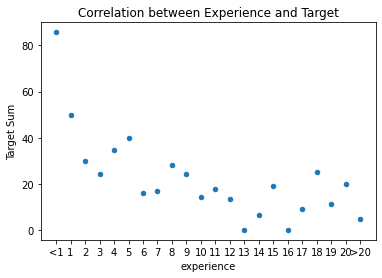

In [13]:
experience_grouped = dropped_df.groupby("experience")
experience_grouped_count = 100 * experience_grouped['target'].sum()/experience_grouped['target'].count()
exp_df = pd.DataFrame(experience_grouped_count)

exp_df = exp_df.reset_index()


def label_race (row):
   if row['experience'] == '<1' :
      return 0
   if row['experience'] == '>20' :
      return 21
   return row['experience']

exp_df['yr_exp'] = exp_df.apply (lambda row: label_race(row), axis=1).astype(int)
#exp_df['yr_exp'] = exp_df['yr_exp'].astype(int)
exp_df = exp_df.sort_values('yr_exp')
exp_df_temp = exp_df
exp_df = pd.DataFrame(exp_df.reset_index()[['experience','target']])
exp_df.dtypes


exp_df.plot(kind="scatter", x='experience',y='target')
plt.title("Correlation between Experience and Target")
plt.ylabel("Target Sum")
plt.show()


In [14]:
x = exp_df_temp['yr_exp']
y = exp_df_temp['target']
exp_df_temp

,experience,target,yr_exp
20,<1,85.714286,0
0,1,50.000000,1
11,2,30.000000,2
13,3,24.137931,3
14,4,34.482759,4
15,5,40.000000,5
16,6,16.129032,6
17,7,16.666667,7
18,8,28.000000,8
19,9,24.137931,9


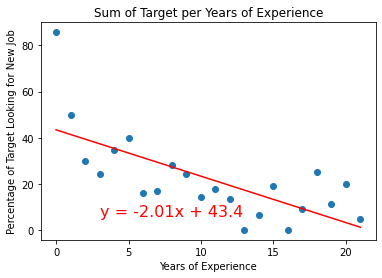

The correlation between Target and Years of Experience is -0.6931.


In [15]:
correlation = st.pearsonr(x,y)

# Calculate linear regression 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Set labels and plot
plt.xlabel("Years of Experience")
plt.ylabel("Percentage of Target Looking for New Job")
plt.title('Sum of Target per Years of Experience')
plt.annotate(line_eq, (3, 6), fontsize=16, color="red")
plt.show()

# Print correlation efficient
print(f"""The correlation between Target and Years of Experience is {round(correlation[0],4)}.""")

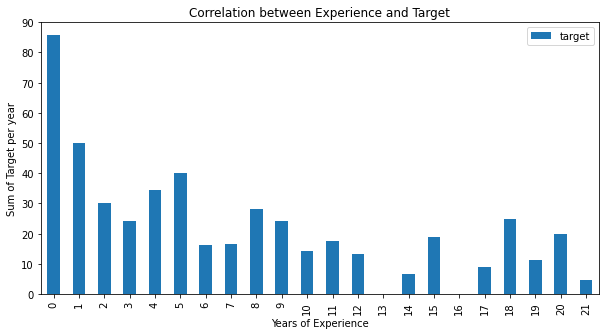

In [16]:
exp_df.plot(kind="bar", figsize=(10,5))
plt.title("Correlation between Experience and Target")
plt.xlabel("Years of Experience")
plt.ylabel("Sum of Target per year")
plt.show()

In [17]:
experience_grouped = dropped_df.groupby("experience")
experience_grouped_count = dropped_df['target'].value_counts()
exp_df = pd.DataFrame(experience_grouped_count)

exp_df.reset_index()


,index,target
0,0.0,391
1,1.0,88


In [18]:
# 4 bins
bins = [0, 50, 150, 250, 500]
# Names for the bins
group_labels = ['a', 'b', 'c', 'd']

dropped_df['Training Hours Summary'] = pd.cut(dropped_df['training_hours'], bins, 
                                       labels=group_labels)
dropped_df

# tr_grouped = dropped_df.groupby("training_hours")
# tr_grouped_count = tr_grouped['target'].count()
# tr_df = pd.DataFrame(experience_grouped_count)

# tr_df.reset_index()




# exp_df.plot(kind="bar", figsize=(10,5))
# plt.title("Correlation between Experience and Target")
# plt.xlabel("Years of Experience")
# plt.ylabel("Sum of Target per year")
# plt.show()

C:\Users\16784\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Training Hours Summary
0,32349,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,61,0.0,b
1,3694,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,1,114,0.0,b
2,1192,city_98,0.949,Male,No relevent experience,Full time course,Graduate,STEM,1,1000-4999,Pvt Ltd,never,3,1.0,a
3,27466,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,Humanities,16,50-99,Pvt Ltd,2,50,0.0,a
4,5468,city_16,0.910,Female,No relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,1,47,0.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,17105,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,never,43,0.0,a
475,22553,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,1,135,1.0,b
476,32010,city_103,0.920,Male,Has relevent experience,Part time course,Graduate,STEM,11,10000+,Pvt Ltd,4,36,1.0,a
477,1501,city_99,0.915,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Other,1,20,0.0,a


In [19]:
univ_grouped = dropped_df.groupby("enrolled_university")
univ_grouped_count = 100 * univ_grouped['target'].sum()/univ_grouped['target'].count()
univ_df = pd.DataFrame(univ_grouped_count)
univ_df

,target
enrolled_university,
Full time course,39.473684
Part time course,12.500000
no_enrollment,16.870416


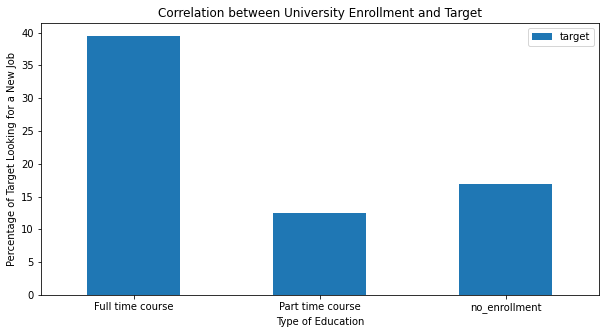

In [20]:
univ_df.plot(kind="bar", figsize=(10,5))
plt.title("Correlation between University Enrollment and Target")
plt.xlabel("Type of Education")
plt.xticks(rotation="horizontal")
plt.ylabel("Percentage of Target Looking for a New Job")
plt.show()

In [21]:
relexp_grouped = dropped_df.groupby("relevent_experience")
relexp_grouped_count = 100 * relexp_grouped['target'].sum()/relexp_grouped['target'].count()
relexp_df = pd.DataFrame(relexp_grouped_count)

relexp_df

,target
relevent_experience,
Has relevent experience,17.298578
No relevent experience,26.315789


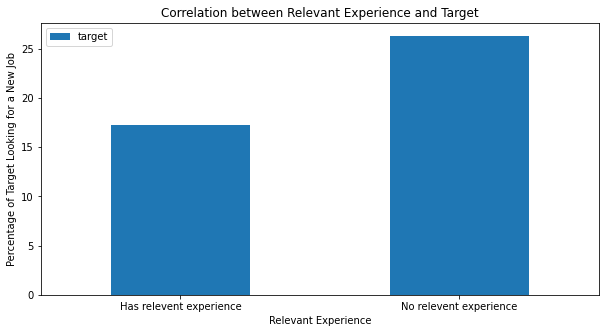

In [22]:
relexp_df.plot(kind="bar", figsize=(10,5))
plt.title("Correlation between Relevant Experience and Target")
plt.xlabel("Relevant Experience")
plt.xticks(rotation="horizontal")
plt.ylabel("Percentage of Target Looking for a New Job")
plt.show()